# Introdução ao processo de Machine Learning para auxílio ao diagnóstico do mal de Parkinson

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Vamos utilizar o conjunto de dados HandPD 

- The HandPD dataset was collected at the Faculty of Medicine of Botucatu, São Paulo State University, Brazil. It is composed of images extracted from handwriting exams of 92 individuals, divided in two groups: (i) the first one contains 18 exams of healthy people, named control group, with 6 male subjects and 12 female individuals; (ii) the second group contains 74 exams of people affected with Parkinson’s disease, named patient group, having 59 male and 15 female subjects.

- Therefore, the entire dataset is composed of 736 images labeled in two groups: patients (296) and control (72).

- We have also made available the dataset with the features extracted according to the aforementioned paper:

**Recogna's Lab:**  http://www2.fc.unesp.br/~papa/pub/datasets/Handpd/

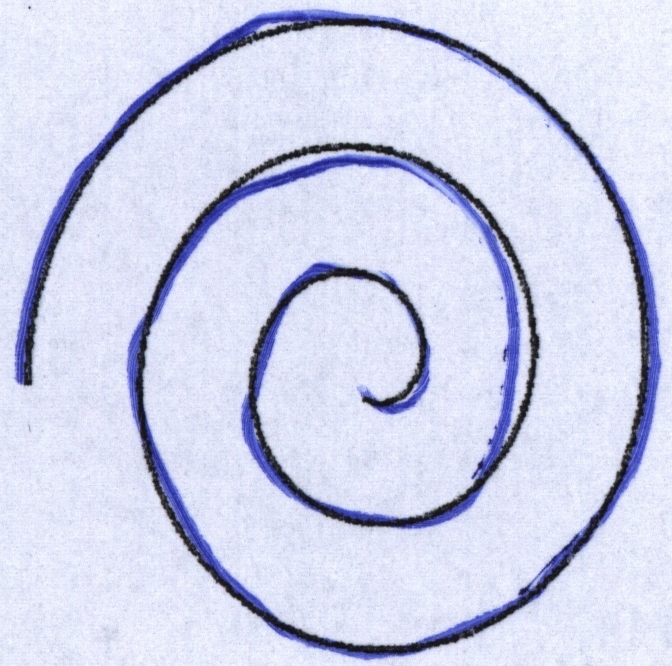

In [2]:
# Entendendo do que se tratam as imagens...
from IPython.display import Image
Image(filename ="S-Control.jpg", width=300, height=300)

## Informação das features extraidas das Imagens

- No conjunto de dados HandPD com imagens, foi necessário encontrar valores que diferenciassem o formulário do contorno, para isso, as seguintes características foram criadas:


**ID_EXAM:** identifier of the exam (handwritten form)

**IMAGE_NAME:** name of the image

**ID_PATIENT:** identifier of the patient

**CLASS_TYPE:** 1 = control group and 2 = patient group

**GENDER:** M = male and F = female

**RIGH/LEFT-HANDED:** R = right handed and L = left handed

**AGE:** age (years)

**RMS:** root mean square (Equation 3 of the paper)

**MAX_BETWEEN_ET_HT:** the maximum difference between ET (exam template) and HT (handwritten trace) radius 
(Equation 4 of the paper)

**MIN_BETWEEN_ET_HT:** the maximum difference between ET and HT radius (Equation 5 of the paper)

**STD_DEVIATION_ET_HT:** standard deviation of the difference between ET and HT radius

**MRT:** mean relative tremor

**MAX_HT:** maximum HT radius

**MIN_HT:** minimum HT radius

**STD_HT:** standard deviation of HT radius

**CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT:** the number of times the difference between ET and HT radius changes from negative to positive, or vice-versa.
    

In [3]:
# Lendo o conjnto de dados
data = pd.read_csv('Spiral_HandPD.csv', sep=',')

In [4]:
# Apresentando suas características e classes
data.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,68,0068-1.jpg,1,1,F,L,28,2446.759108,5388.771096,3.343540e+04,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2159.220559,4617.939790,3.442829e+04,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,68,0068-3.jpg,1,1,F,L,28,1740.390711,4260.973134,3.363295e+07,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2047.900847,4286.241318,3.241294e+04,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,92,0092-1.jpg,2,1,M,R,37,2059.220895,4733.016802,3.543708e+04,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [5]:
# Apresentando informações das classes do conjunto de dados com value_counts()
data['CLASS_TYPE']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
338    2
339    2
340    2
341    2
342    2
343    2
344    2
345    2
346    2
347    2
348    2
349    2
350    2
351    2
352    2
353    2
354    2
355    2
356    2
357    2
358    2
359    2
360    2
361    2
362    2
363    2
364    2
365    2
366    2
367    2
Name: CLASS_TYPE, Length: 368, dtype: int64

In [6]:
# Lendo novamente o conjnto de dados porém, agora trazendo somente as 
# colunas que possuem representatividade para nossos experimentos.
data = pd.read_csv('Spiral_HandPD.csv', sep=',', usecols=[3,7,8,9,10,11,12,13,14,15], header=0)

In [7]:
# Temos agora uma coluna contendo as classes e 9 contendo as features
data.columns

Index(['CLASS_TYPE', 'RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT',
       'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')

In [8]:
# Criando o DataFrame
df = pd.DataFrame(data)

In [9]:
df['CLASS_TYPE'].value_counts()

2    296
1     72
Name: CLASS_TYPE, dtype: int64

In [10]:
print(np.array(df['CLASS_TYPE']))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
# Trazendo as informações básicas do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
CLASS_TYPE                                         368 non-null int64
RMS                                                368 non-null float64
MAX_BETWEEN_ET_HT                                  368 non-null float64
MIN_BETWEEN_ET_HT                                  368 non-null float64
STD_DEVIATION_ET_HT                                368 non-null float64
MRT                                                368 non-null float64
MAX_HT                                             368 non-null float64
MIN_HT                                             368 non-null float64
STD_HT                                             368 non-null float64
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    368 non-null float64
dtypes: float64(9), int64(1)
memory usage: 28.8 KB


**Consultando dados nulos ou Missing Values no Dataframe**

In [12]:
df.isnull().sum()

CLASS_TYPE                                         0
RMS                                                0
MAX_BETWEEN_ET_HT                                  0
MIN_BETWEEN_ET_HT                                  0
STD_DEVIATION_ET_HT                                0
MRT                                                0
MAX_HT                                             0
MIN_HT                                             0
STD_HT                                             0
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0
dtype: int64

## Visualização dos dados em Grafos e valores Estatísticos

In [13]:
import seaborn as sns # vizualizar informações
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

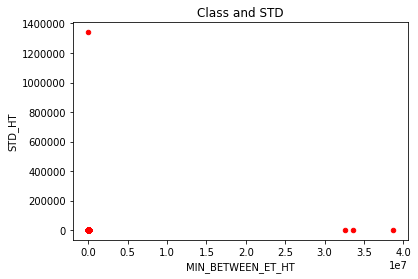

In [14]:
# Plot para análise da destribuição das features e suas relações
df.plot(x='MIN_BETWEEN_ET_HT',y='STD_HT',kind='scatter', title='Class and STD',color='r')

<IPython.core.display.Javascript object>


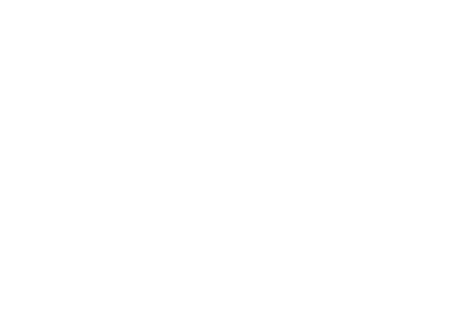

<IPython.core.display.Javascript object>


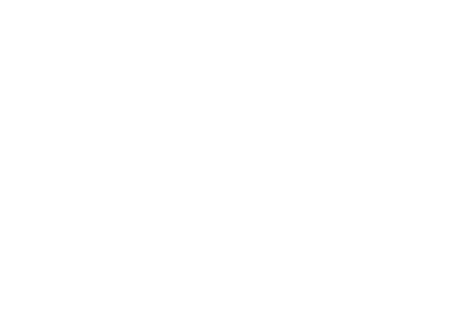

In [15]:
# Plota um Histograma com a RMS
# bins é uma técnica do Pandas para agrupar os elementos
%matplotlib notebook
df['MAX_BETWEEN_ET_HT'].hist(bins=100, color='green')

In [16]:
# Com o grafo podemos observar a a distribuição se concentra na maior parte por volta do valor 4200
df['MAX_BETWEEN_ET_HT']

0      5388.771096
1      4617.939790
2      4260.973134
3      4286.241318
4      4733.016802
5      4538.246721
6      5053.369606
7      4150.591361
8      4426.776214
9      4664.458217
10     3976.367648
11     4466.148040
12     4027.161154
13     4177.163245
14     4954.230562
15     4568.214917
16     3610.808028
17     4859.740466
18     4548.137764
19     4842.003611
20     4077.706981
21     4334.737166
22     4637.211154
23     5622.181025
24     4210.159529
25     4837.706864
26     4141.014729
27     3107.150192
28     4263.448951
29     4323.307538
          ...     
338    4574.983891
339    4065.073395
340    3911.518048
341    5121.126186
342    4986.161952
343    4787.708488
344    4045.519127
345    4313.076989
346    4309.802269
347    4203.583661
348    5300.917396
349    4879.406538
350    4316.446136
351    4267.324499
352    4143.777555
353    4586.716971
354    4103.226935
355    4222.286577
356    4029.620858
357    5402.324162
358    5522.584304
359    4994.

<IPython.core.display.Javascript object>


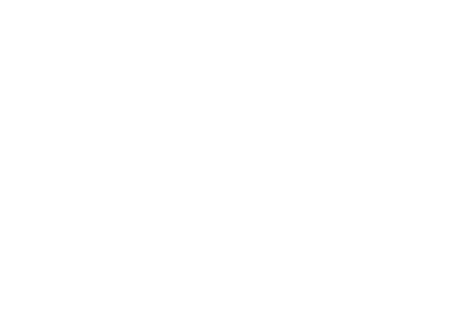

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa6ddd9b0>,
      dtype=object)

<IPython.core.display.Javascript object>


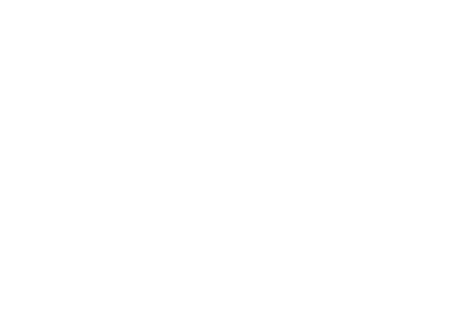

In [17]:
# Plota um Histograma de duas colunas lado a lado para ver a distribuição dos dados
#%matplotlib notebook
df[['STD_DEVIATION_ET_HT','MAX_HT']].hist(bins=30, alpha=0.8, color='blue')

In [18]:
# Apresenta a simetria dos valores da coluna. valor 0 = Simétrica, > 0 distribuição positiva,
# < 0 distribuição negativa. Isso tudo comparando com o valor da média
df['STD_HT'].skew()

19.183044661819203

In [19]:
# Podemos dessa forma analizar a simetria do conjunto de dados por um todo
# Para esse conjunto de dados, podemos verificar que nossos dados são muito desbalanceados estatísticamente
df.skew()

CLASS_TYPE                                         -1.540678
RMS                                                 1.500498
MAX_BETWEEN_ET_HT                                   0.821140
MIN_BETWEEN_ET_HT                                  11.082499
STD_DEVIATION_ET_HT                                16.672745
MRT                                                13.509079
MAX_HT                                              0.195641
MIN_HT                                             19.173190
STD_HT                                             19.183045
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT     0.117314
dtype: float64

In [20]:
# Podemos criar uma função para visualização de nossos dados

def plota_dispersao_1():
    fig = plt.figure()
    # Altera o tamanho do gráfico impresso
    ax1 = fig.add_subplot(111)

    #gera dados aleatórios              
    x = df['MAX_BETWEEN_ET_HT']
    y = df['STD_DEVIATION_ET_HT']
    ax1.scatter(x,y,color='blue',s=12,edgecolor='none')
    
    # Vamos usar agora o ggplot, irá melhorar ainda mais a apresentação do grafico
    plt.style.use('ggplot')
    
    #deixa os eixos quadrados
    ax1.set_aspect(1./ax1.get_data_ratio()) 
    plt.show()

<IPython.core.display.Javascript object>


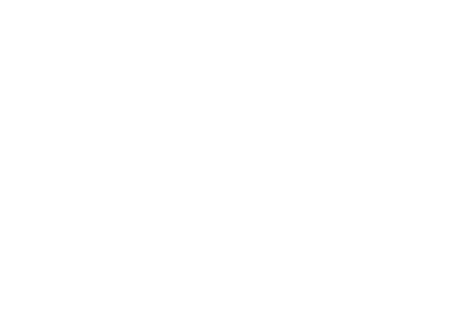

<IPython.core.display.Javascript object>


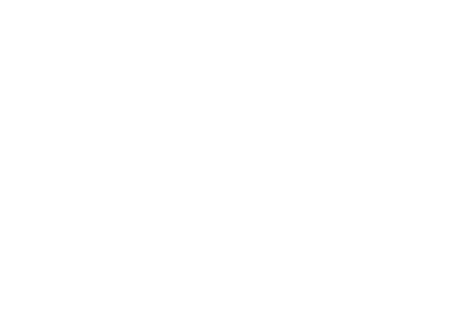

In [21]:
# Podemos ir alterando os parametros para análise da distribuição dos dados
plota_dispersao_1()

## Plotando Box-Plot

- Para esse tipo de gráfico, utilizaremos o conjunto de dados de valores de residencias apresentado no início da aula.
- Vamos então plotar um boxplot da coluna bedrooms
- Esse tipo de gráfico é muito rico de informações, podendo visualizar até mesmo os Outliers
- Esse tipo de gráfico é muito utilizado para apresentar a variabilidade (Dispersão) dos dados, valores máximos e mínimos bem como, outliers.

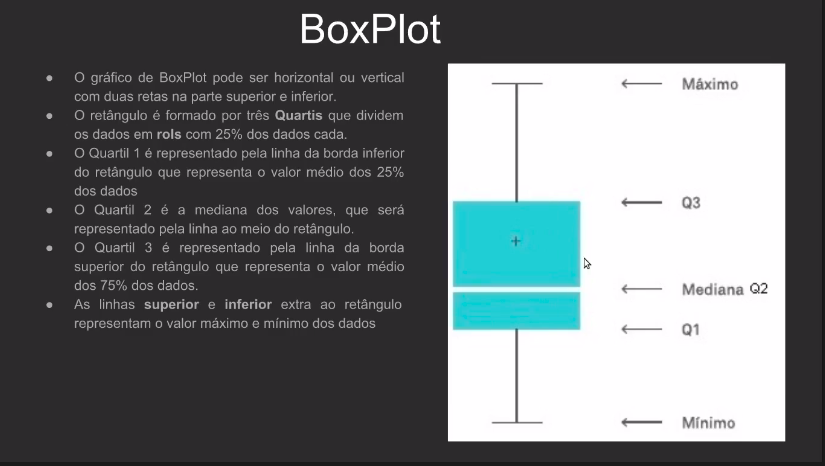

In [22]:
from IPython.display import Image
Image(filename ="boxplot.png", width=800, height=800)

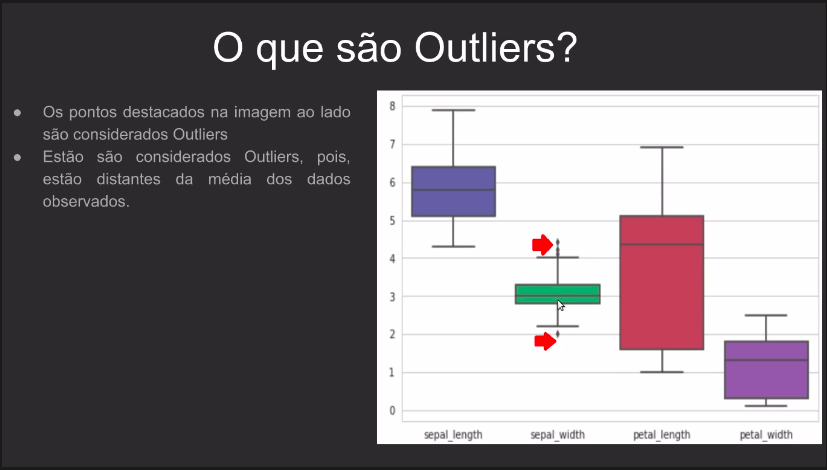

In [23]:
Image(filename ="boxplot2.png", width=800, height=800)

<IPython.core.display.Javascript object>


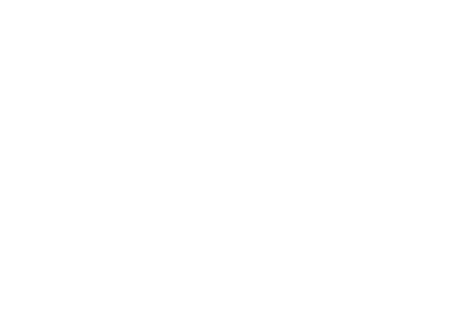

<IPython.core.display.Javascript object>


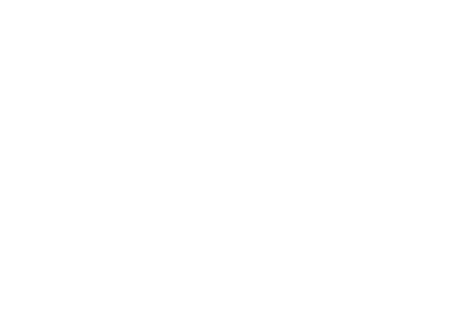

In [24]:
# Apresentação dos Outliers do Maximo entre ET and HT
%matplotlib notebook
plt.style.use('ggplot')
df.boxplot(column='MAX_BETWEEN_ET_HT')

- Podemos verificar na imagem acima a destribuição dos dados e os pontos de outlier contidos no conjunto de dados 

<IPython.core.display.Javascript object>


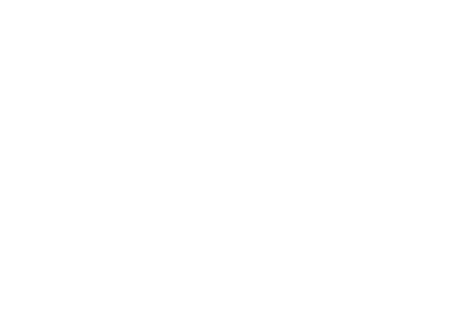

<IPython.core.display.Javascript object>


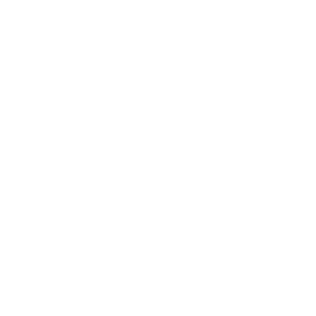

<IPython.core.display.Javascript object>


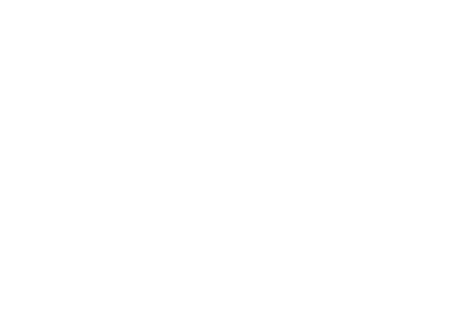

<IPython.core.display.Javascript object>


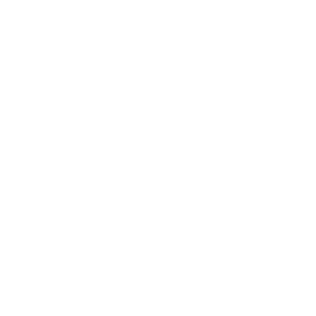

In [25]:
# Com Pandas
df.CLASS_TYPE.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo

# Com Seaborn
sns.factorplot('CLASS_TYPE', data=df, kind='count')

<IPython.core.display.Javascript object>


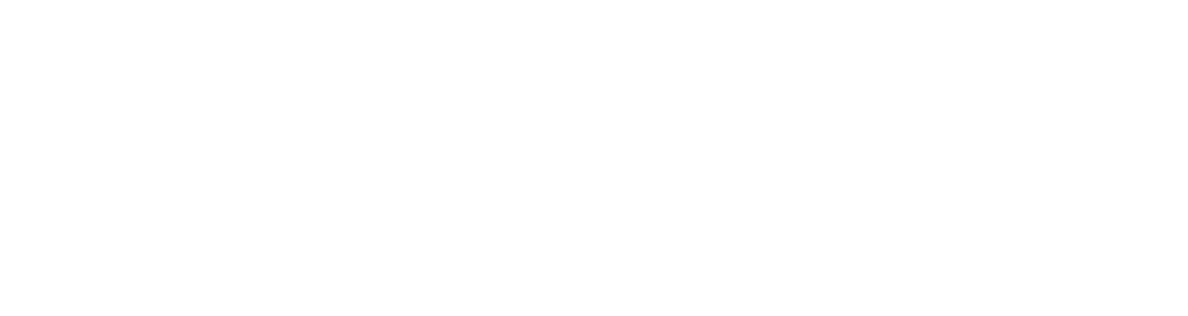

In [26]:
%matplotlib notebook
df[['MAX_BETWEEN_ET_HT', 'RMS']].plot(figsize=(15, 4), title='HandPD', grid=True)

# Função para cálculo do coeficiente de correlação de Pearson

## O que são coeficientes de correlação?

- Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis e o que elas representam.

- Co-variancia dividido pelo produto do DP de "x" e "y"

- O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas.

$\rho = \frac{\sum xy - \frac{\sum x * \sum y}{n}}{\sqrt{(\sum x^{2} - \frac{(\sum x)^{2}}{n}}) * (\sum y^{2} - \frac{(\sum y)^{2}}{n})}$

- Muitas ferramentas estão prontas para o uso porém, o cientista de dados necessita ter o **conhecimento real** da função para realmente poder tratar os dados.
- Vamos ver como seria essa situação?


- O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1.


- Quando  o coeficiente de correlação se aproxima de 1, nota-se um aumento no valor de uma variável quando a outra também aumenta, ou seja, há uma relação linear positiva. Quando o coeficiente se aproxima de -1, também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de correlação negativa ou inversa.

In [27]:
df.corr()

,CLASS_TYPE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
CLASS_TYPE,1.000000,0.176411,0.094716,-0.028578,0.046285,0.036389,-0.152115,0.024731,0.025601,0.138796
RMS,0.176411,1.000000,0.792406,-0.047871,0.093352,0.093176,0.229784,0.168479,-0.076454,0.222807
MAX_BETWEEN_ET_HT,0.094716,0.792406,1.000000,-0.035677,-0.071299,0.119838,0.151136,-0.022350,-0.072270,0.193187
MIN_BETWEEN_ET_HT,-0.028578,-0.047871,-0.035677,1.000000,-0.008425,-0.006383,0.033715,-0.003440,-0.004542,0.014074
STD_DEVIATION_ET_HT,0.046285,0.093352,-0.071299,-0.008425,1.000000,-0.004824,0.091123,0.013756,-0.005501,0.013375
MRT,0.036389,0.093176,0.119838,-0.006383,-0.004824,1.000000,0.025760,-0.004033,-0.003708,0.007718
MAX_HT,-0.152115,0.229784,0.151136,0.033715,0.091123,0.025760,1.000000,0.037335,-0.064218,0.031398
MIN_HT,0.024731,0.168479,-0.022350,-0.003440,0.013756,-0.004033,0.037335,1.000000,-0.003208,0.082694
STD_HT,0.025601,-0.076454,-0.072270,-0.004542,-0.005501,-0.003708,-0.064218,-0.003208,1.000000,0.027809
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT,0.138796,0.222807,0.193187,0.014074,0.013375,0.007718,0.031398,0.082694,0.027809,1.000000


In [28]:
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)

In [29]:
# Calculando a correlação
corr = df.corr() 
plot_corr(corr)

<IPython.core.display.Javascript object>


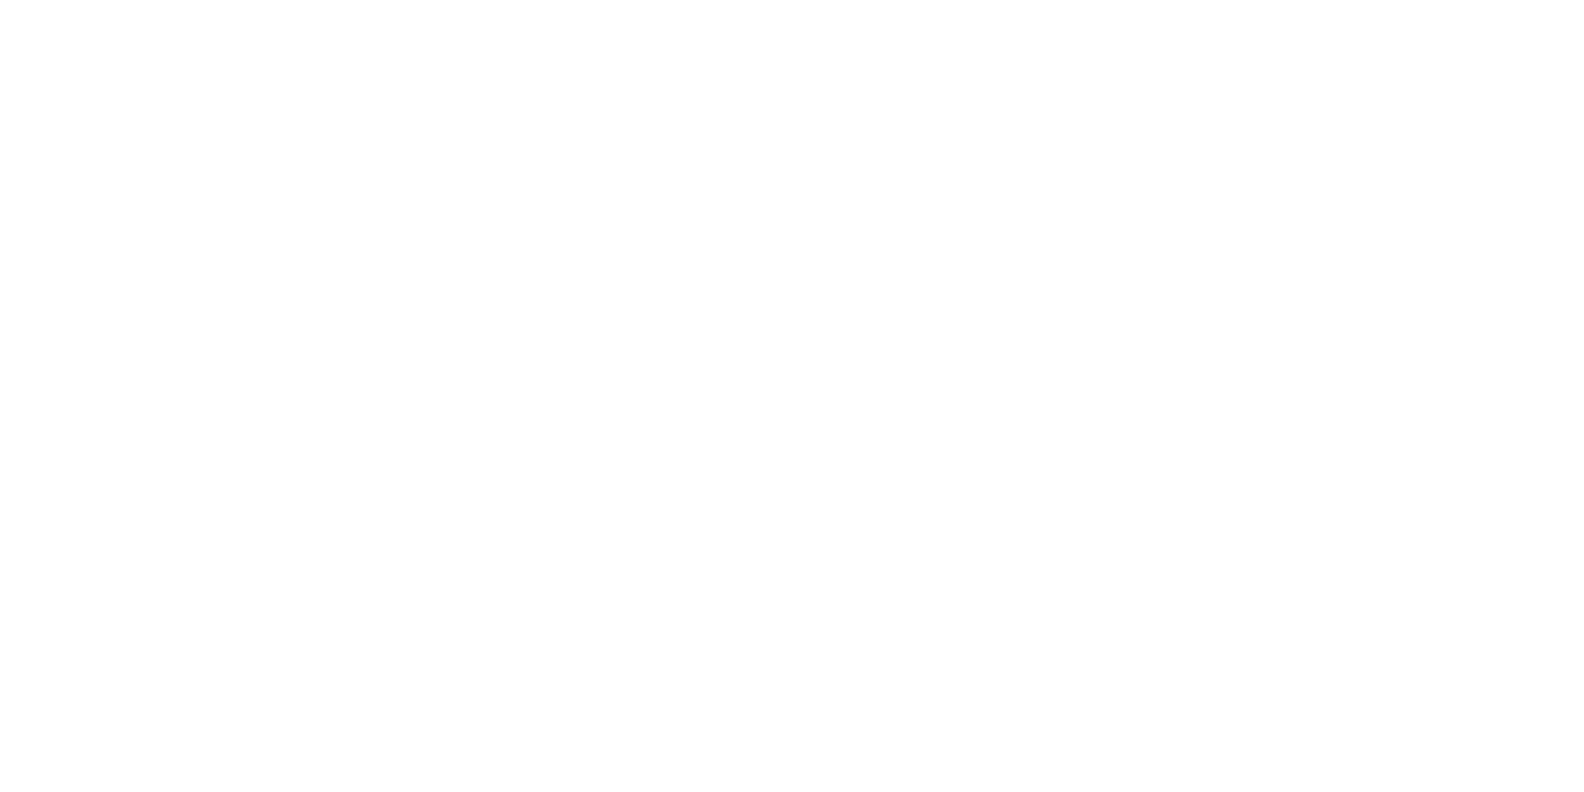

In [30]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,10))
plt.show()

<IPython.core.display.Javascript object>


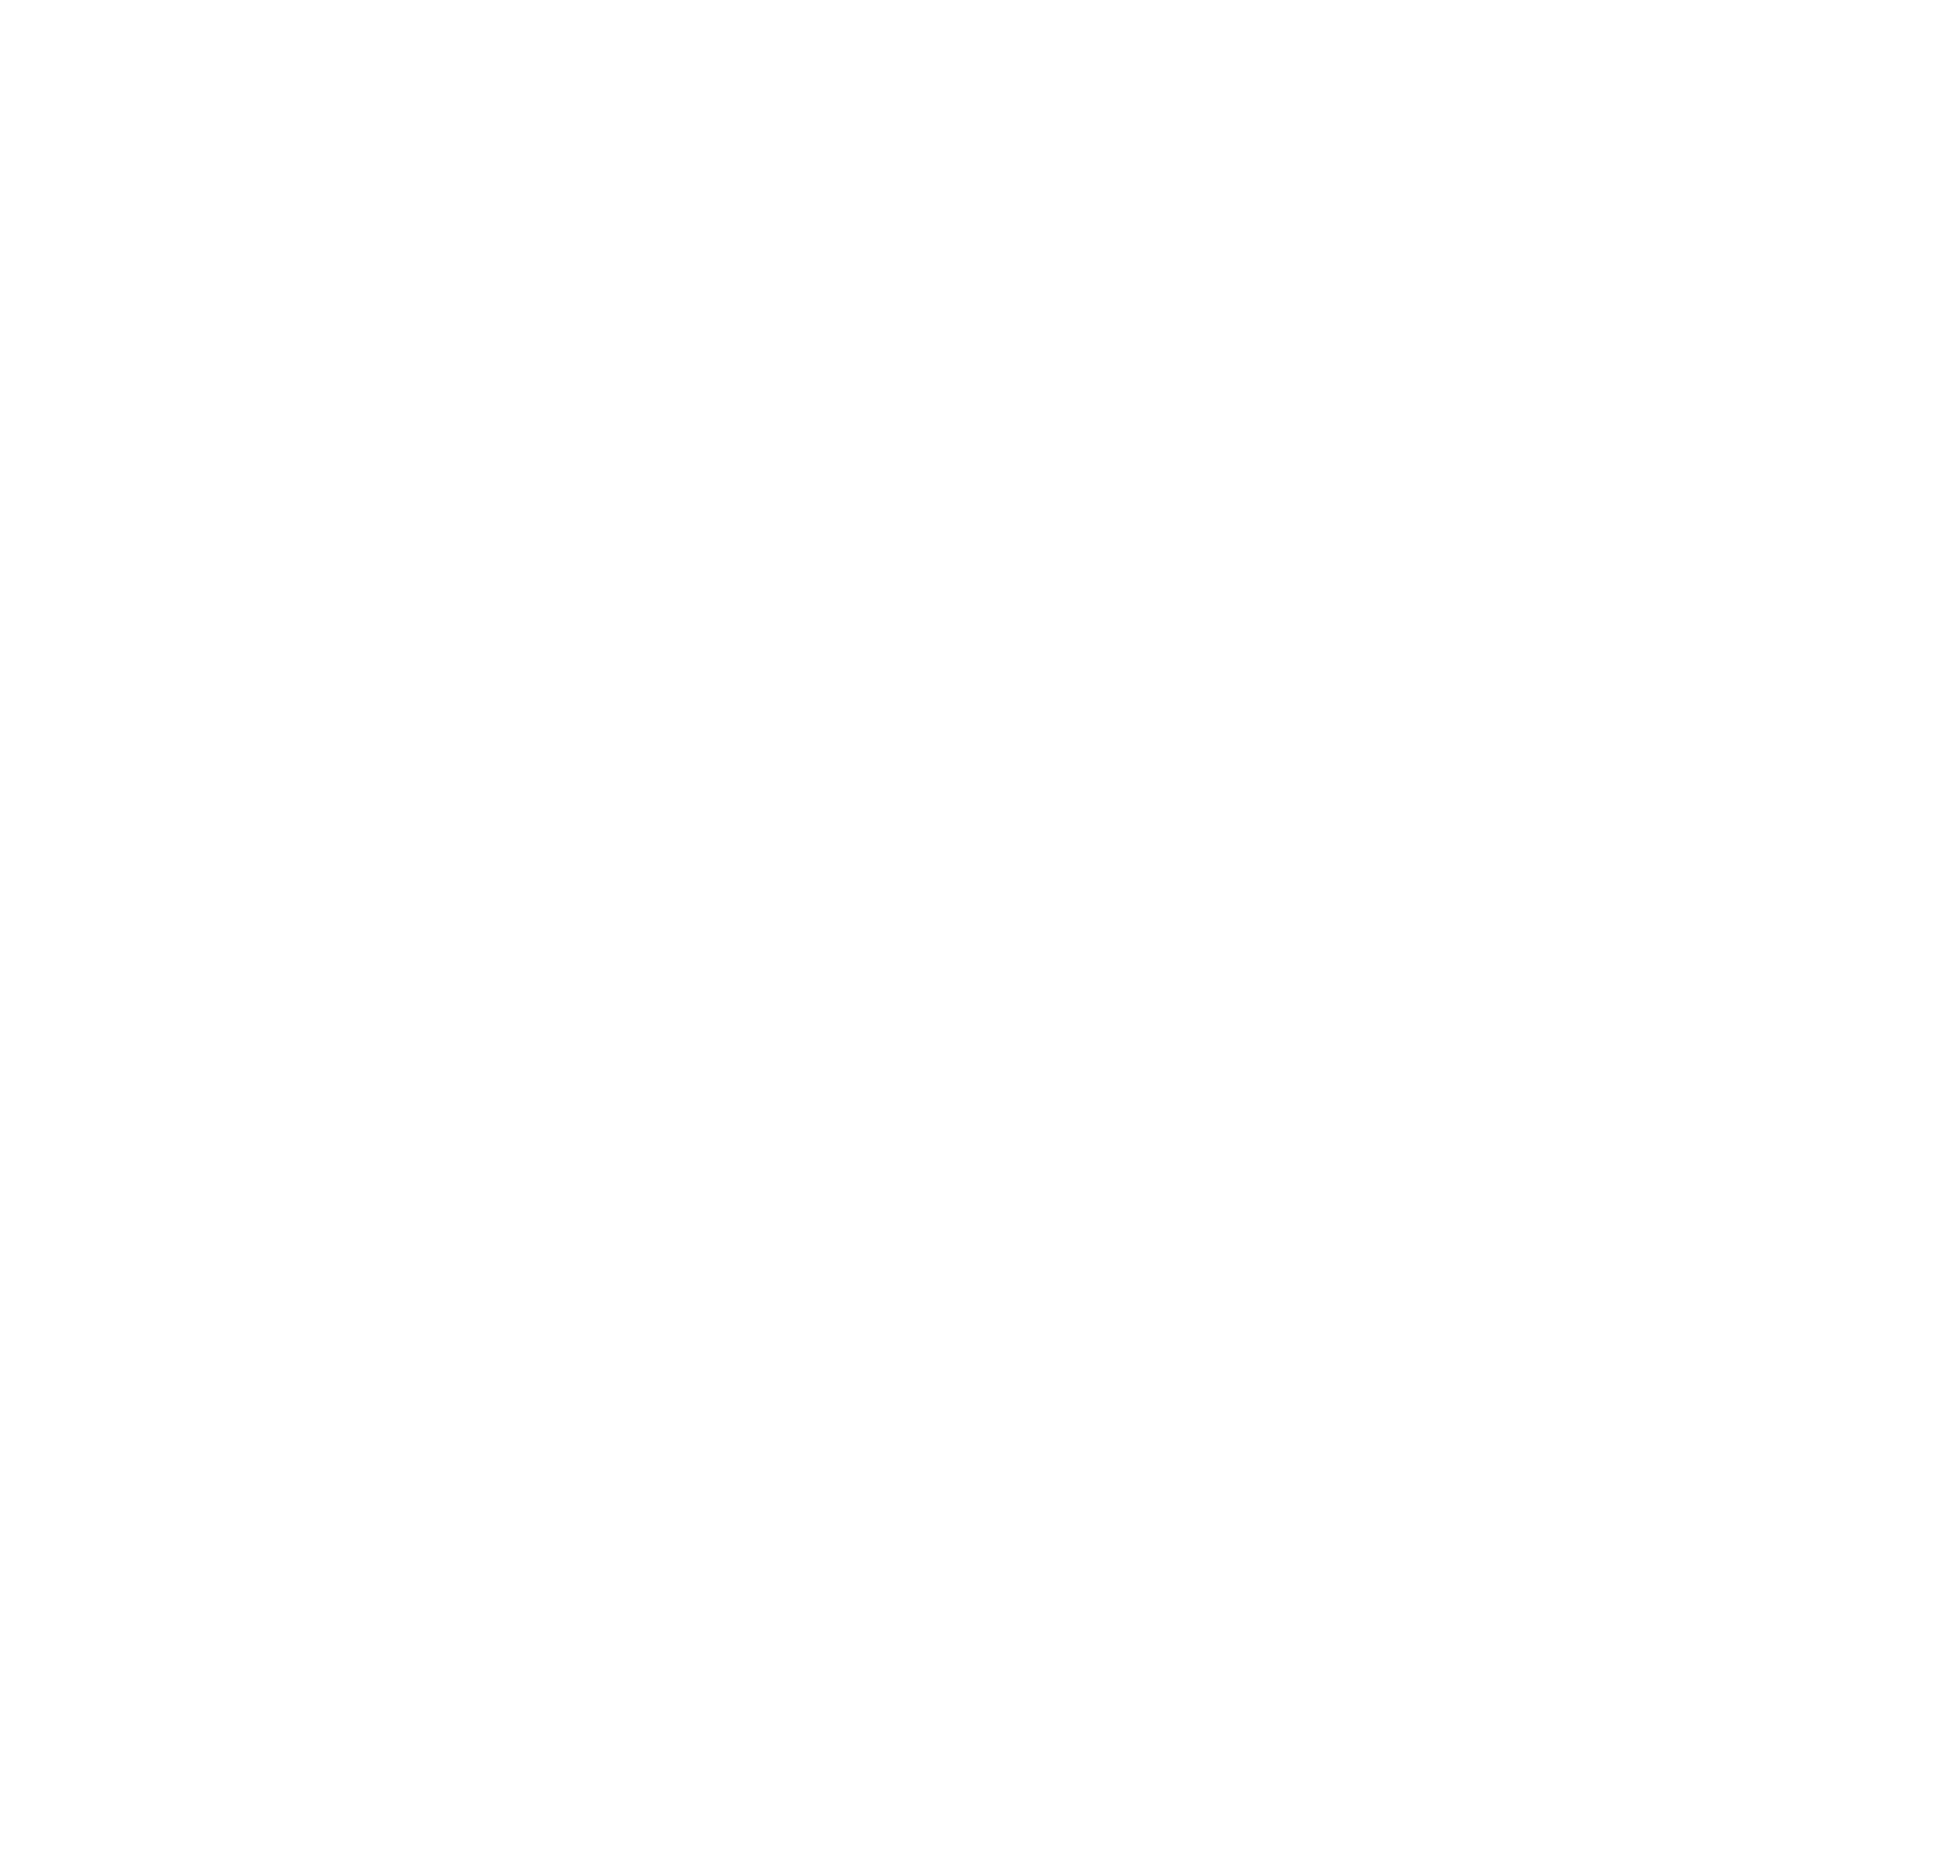

In [31]:
df2 = df
sns.pairplot(df2, hue="CLASS_TYPE")

# Classificador Supervisionado - KNN (k Nearest Neighbors)

- É um dos algoritmos de classificação mais simples.

- Usado para classificar objetos com base em exemplos de treinamento que estão mais próximos no espaço de características. 

### Para utilizar um algoritmo de knn é necessário:

**(1) Um conjunto de exemplos de treinamento.**

**(2) Definir uma métrica para calcula a distância entre os exemplos de treinamento.**

**(3) Definir o valor de K (o número de vizinhos mais próximos que serão considerados pelo algoritmo).**

- Existem varias formas diferentes de calcular essa distancia. A mais simples é a distancia euclidiana:

$\begin{equation}
 d=\sqrt{ \sum\limits_{i=1}^n (q_i-p_i)^2},
  \label{eq:euclideam_distance}
\end{equation}
$

- distância euclidiana $d$ ao comprimento de um  segmento de reta que une dois pontos, o que matematicamente pode ser escrito através da expressão em que $p=(p_1,p_2,p_3,...,p_n)$ e $q=(q_1,q_2,q_3,...,q_n)$

- A Distância Euclidiana é definida como a soma da raiz quadrada da diferença entre x e y em suas respectivas dimensões.

- Já a Distância Manhattan tem uma definição mais simples na qual é apenas a soma das diferenças entre x e y em cada dimensão.

**Abaixo segue a representação matemática dessas duas medidas:**

- Distância Euclideana: √((x1 – x2)² + (y1 – y2)²).

- Distância Manhattan: |x1 – x2| + |y1 – y2|.

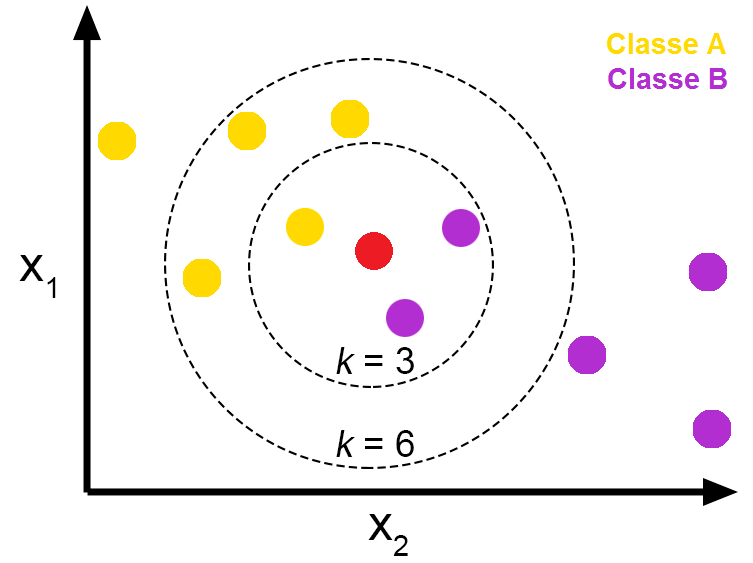

In [32]:
Image(filename ="knn.png", width=500, height=500)

# Iniciando o processo de Machine Learning

### Divisão dos dados em conjunto de treino e conjunto de teste.

- O primeiro parâmetro é passado utilizando o método *drop* com os dados sem os parâmetros de classes;
- O segundo parâmetro são os valores referentes as classes, no caso *CLASS_TYPE*;
- Por último, o parâmetro *test_size=0.3* está especificando que meu conjunto de teste terá 30% do conjunto, sendo X_test(os 4 atributos) e y_test(classes).
- Então, 70% é para o conjunto de treinamento armazenado nas vareáveis X_train(os 4 atributos) e y_train(classes).

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('CLASS_TYPE', axis=1), df['CLASS_TYPE'], test_size=0.3)

In [34]:
X_train.columns

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')

In [35]:
#Verifica a frequência de cada classe na base de treino e teste
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequência de instâncias por classe:")
print(np.asarray((unique_elements, counts_elements)))

Frequência de instâncias por classe:
[[  1   2]
 [ 51 206]]


In [36]:
# Verificando as informações do Split nos conjuntos treino e teste
print(np.array(y_test))

[2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 1 1 2 2
 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1]


In [37]:
# Verificando a forma dos dados
X_train.shape, X_test.shape

((257, 9), (111, 9))

## Instanciando o algoritmo knn

In [38]:
# Biblioteca do sklearn já tem o classificador com diversos parametros, n_neighbors é nosso k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #Shift+tab apresenta todos os parâmetros

In [39]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
# Treinando o algoritmo passando os parâmetros de treinamento para o método fit
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Executando o knn com o conjunto de teste

In [41]:
# Metodo predict que recebe os dados de teste para efetuar a predição das amostras
result = knn.predict(X_test)
result

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2])

## Técnicas de Validação para análise do comportamento do algoritmo knn

In [42]:
# Matriz de confusão recebe como parâmetro o conjunto de teste(classes) e os resultados para efetuar as comparações
# entre o valor real e o valor predito pelo algoritmo.
print(pd.crosstab(y_test, result, rownames=['Real'], colnames=['       Predito'], margins=True))

       Predito   1   2  All
Real                       
1                4  17   21
2               12  78   90
All             16  95  111


 ### A matriz de confusão nos proporciona ver quais classes ele confundiu no momento da classificação
 
#### Verdadeiro Positivo e Falso Positivo

- Quando o modelo prevê um caso positivo corretamente nós temos então um caso de **Verdadeiro Positivo (True Positive)**

    - Ex: O modelo prediz que **8** imagens de **indivíduos saudáveis (1)** corretamente.
    
    

- Caso o seu modelo diga que uma imagem é de um **Indivíduo portador da doença (2)** quando na verdade não é **(é do grupo 1)**, nós temos então um caso de **Falso Positivo (False Positive)**, também conhecido como Type I Error.

    - Ex: O modelo prediz que **16** imagens de **indivíduos saudáveis (1)** classificados como da **classe 2**

#### Falso Negativo e Verdadeiro Negativo

- O oposto também pode ocorrer. Quando o modelo diz que a foto não é de um **Paciente (2)**, mas na verdade é, temos um caso de Falso **Negativo**, também conhecido como Type II Error; 

    - Ex: O modelo prediz que **8** imagens de **Pacientes (2)** não são dessa classe, mas na verdade é!
    
    

- Quando ele diz que a imagem não é de um **indivíduo saldável (1)**, e ele está certo, ocorre o chamamos de **Verdadeiro Negativo**.

    - Ex: O modelo prediz que **79** imagens não é de **indivíduos saudaveis (1)** e sim, de **Pacientes (2)**.
    
## No final das contas, tudo que é verdadeiro é bom, e tudo que é falso é ruim, rsss

In [43]:
# É possível verificar a taxa de acerto sobre cada classe
from sklearn import metrics
print(metrics.classification_report(y_test, result))

             precision    recall  f1-score   support

          1       0.25      0.19      0.22        21
          2       0.82      0.87      0.84        90

avg / total       0.71      0.74      0.72       111



Confusion matrix, without normalization
[[ 4 17]
 [12 78]]


<IPython.core.display.Javascript object>


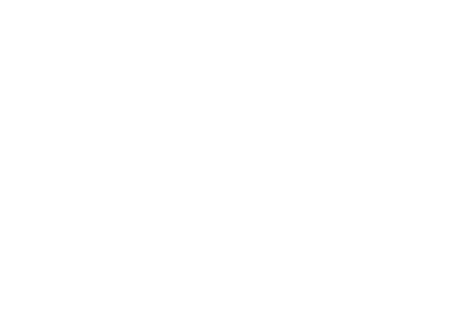

Normalized confusion matrix
[[0.19 0.81]
 [0.13 0.87]]


<IPython.core.display.Javascript object>


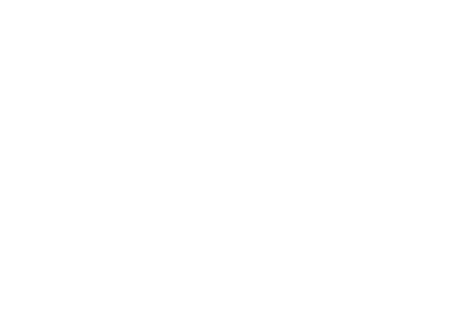

In [44]:
# Função para plotar a matriz de confusão

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, result,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, result)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, result)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, result,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, result, normalize=True,title='Normalized confusion matrix')

plt.show()

## Executando novas amostras



In [45]:
# Vamos ver o que temos nos dados que estamos trabalhando para criarmos um array para o teste
df.head(1)

,CLASS_TYPE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,1,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138


In [46]:
# Passo as features de uma nova imagem para ele classificar 213-4.jpg
newtest = np.array([[1662.880293, 3801.356089, 26495.72736, 0.000715, 22.505453, 170.125521, 0.019845, 1270.620131, 0.177843]])

In [47]:
newtest

array([[1.66e+03, 3.80e+03, 2.65e+04, 7.15e-04, 2.25e+01, 1.70e+02,
        1.98e-02, 1.27e+03, 1.78e-01]])

In [48]:
# proba retorna a probabilidade dos dados para aquela amostra, para esse nosso caso é 100% para a classe 1
knn.predict(newtest), knn.predict_proba(newtest)

(array([2]), array([[0., 1.]]))

## Cross validation

- A melhor forma de verificarmos a validação dos nossos resultados é através do Cross Validation, que separa os dados de treino e teste de forma iterativa.

- Essa técnica de validação cruzada **(Cros Validation)** que utilizamos é também chamada de **K-fold**. 

 - Ela é uma técnica muito utilizada em aprendizado de máquina, pois nos permite testar em vários cenários os nossos algoritmos antes de colocá-los em produção.
 
 - Este método consiste em dividir o conjunto total de dados em **k** subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir disto, um subconjunto é utilizado para teste e os **k-1** restantes são utilizados para estimação dos parâmetros e calcula-se a acurácia do modelo. 
 
 - Este processo é realizado **k** vezes alternando de forma circular o subconjunto de teste.

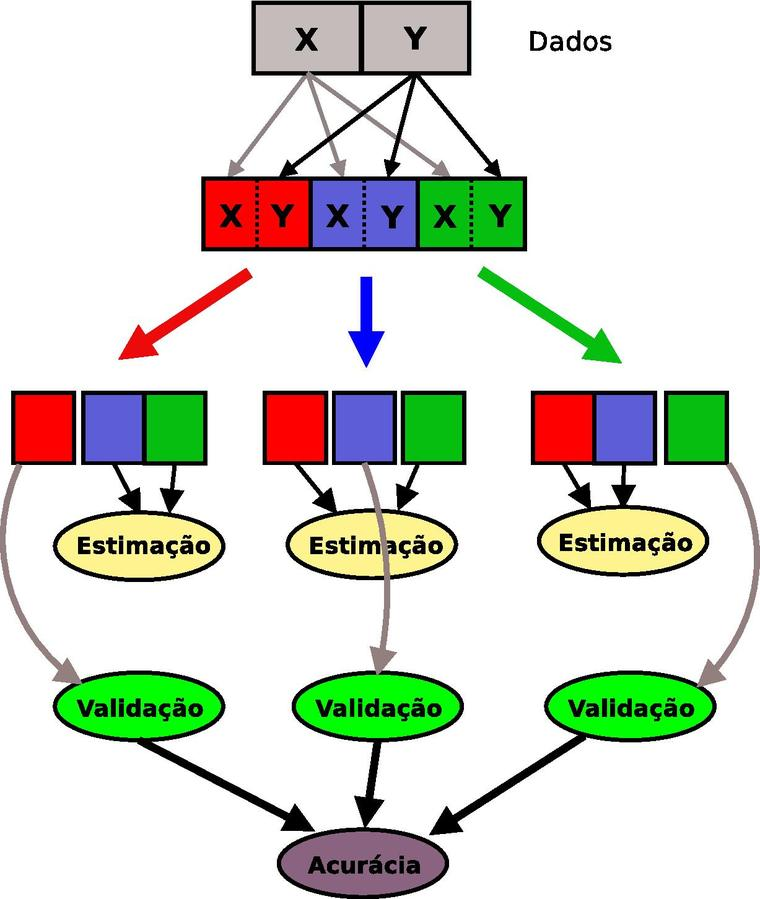

In [49]:
Image(filename ="Kfold.jpg", width=500, height=500)

In [50]:
# Aqui não especificamos os conjuntos de treino e de teste, apenas o numero de pacotes que é = 5
# Essa função nos retorna um vetor com as taxas de acerto de cada combinação. 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, df.drop('CLASS_TYPE', axis=1), df['CLASS_TYPE'], cv=5)
scores

array([0.77, 0.72, 0.86, 0.82, 0.74])

In [51]:
# Nós podemos tirar uma média geral somando esses valores e dividindo pelo tamanho do vetor:
media = sum(scores) / len(scores)
print(media)

0.7828414167592249


# Otimizando o parametro k

### Importando o GridSearch

- Essa ferramenta GridSearch garante uma busca nos parâmetros de um determiado algoritmo retornando uma faixa de melhores valores a serem trabalhados por parâmetro k

In [52]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para os parâmetros

In [53]:
# Valor para o parâmetro k entre 1 e 30, essa combinação será feita pelo GridSearch
k_list = list(range(1,31))

In [54]:
k_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [55]:
# Dicionario que receberá uma lista de valores variando de 1 a 30 
# no atributo n_neighbors para ver o melhor valor de k
k_values = dict(n_neighbors = k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [56]:
# Instanciando o objeto GridSearch, dividido em 5 folds e realizando várias combinações
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [57]:
# Treinando o objeto passando o conjunto de dados completo
grid.fit(df.drop('CLASS_TYPE', axis=1), df['CLASS_TYPE'])

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
# Visualizando os valores de scores que irá retornar as saidas com os valores de k
grid.grid_scores_

/home/clayton/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72554, std: 0.03745, params: {'n_neighbors': 1},
 mean: 0.66848, std: 0.09561, params: {'n_neighbors': 2},
 mean: 0.78261, std: 0.05356, params: {'n_neighbors': 3},
 mean: 0.76087, std: 0.04067, params: {'n_neighbors': 4},
 mean: 0.80707, std: 0.03936, params: {'n_neighbors': 5},
 mean: 0.78804, std: 0.04562, params: {'n_neighbors': 6},
 mean: 0.80707, std: 0.02103, params: {'n_neighbors': 7},
 mean: 0.79348, std: 0.02632, params: {'n_neighbors': 8},
 mean: 0.82609, std: 0.01719, params: {'n_neighbors': 9},
 mean: 0.80707, std: 0.02274, params: {'n_neighbors': 10},
 mean: 0.82337, std: 0.01654, params: {'n_neighbors': 11},
 mean: 0.81250, std: 0.02173, params: {'n_neighbors': 12},
 mean: 0.81250, std: 0.00842, params: {'n_neighbors': 13},
 mean: 0.81522, std: 0.02302, params: {'n_neighbors': 14},
 mean: 0.81793, std: 0.00489, params: {'n_neighbors': 15},
 mean: 0.81250, std: 0.01620, params: {'n_neighbors': 16},
 mean: 0.81522, std: 0.01637, params: {'n_neighbors': 17},
 mean:

In [59]:
# Apresentando a melhor acurácia com o melhor valor de k
print('O melhor valor de k = {} com valor {} de acurácia'.format(grid.best_params_, grid.best_score_))

O melhor valor de k = {'n_neighbors': 9} com valor 0.8260869565217391 de acurácia


### Visualização dos valore de k e de acurácia

/home/clayton/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<IPython.core.display.Javascript object>


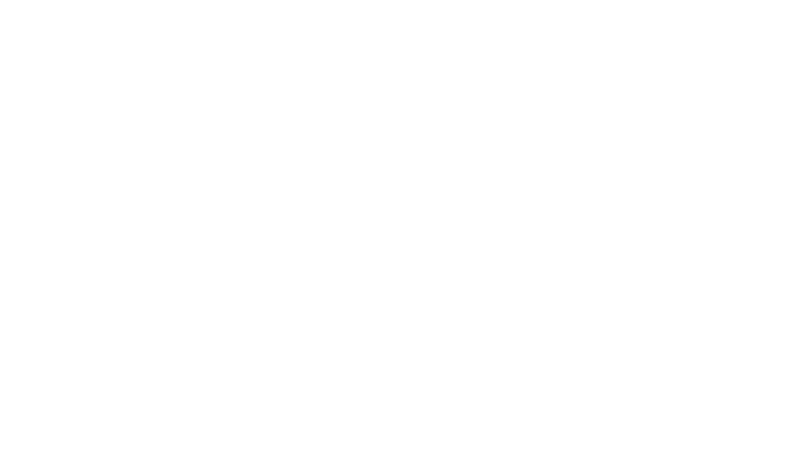

In [60]:
scores = []
for score in grid.grid_scores_:
    scores.append(score[1])
    
plt.figure(figsize=(10,6))
plt.plot(k_list, scores, color='red', linestyle='dashed', marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# k-Means, Agrupamento de Dados

- Uma outra forma para se trabalhar com Machine learning é o *aprendizado não supervisionado*. 

- Diferente do *aprendizado supervisionado* onde você informa o computador o que ele deve procurar e aprender, no aprendizado não supervisionado a gente não sabe exatamente o que estamos tentando ensinar o computador a aprender, então precisamos recorrer à agrupadores lógicos de segmentação para encontrar similaridade entre os dados da amostra e com isso, definir um padrão e assumir que este padrão encontrado é o que estamos tentando ensinar o computador, que por sua vez, vai aprender a encontrar esse padrão sempre quando for solicitado.

- Depois de descoberto o padrão, qualquer item novo que tenha uma similaridade com aquele segmento (cluster) pode ser inferido que ele “faz parte daquilo”.

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline

<IPython.core.display.Javascript object>


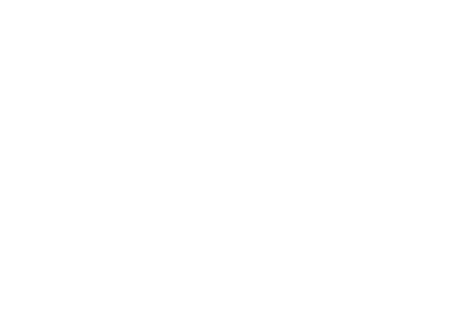

In [62]:
%matplotlib notebook
plt.scatter(df['CLASS_TYPE'], df['CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'])

## Separando os valores de dados e classes

In [63]:
# Como estaremos utilizando um classificador não supervisionado, não separamos mais o conjunto em treino e teste
x = df.drop('CLASS_TYPE', axis=1)

In [64]:
# Agora só temos as features
x

,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,2446.759108,5388.771096,3.343540e+04,0.000000,26.849731,183.854351,0.017068,1779.550502,0.216138
1,2159.220559,4617.939790,3.442829e+04,0.000000,26.758489,186.609895,0.000000,1885.340368,0.184438
2,1740.390711,4260.973134,3.363295e+07,0.000000,30.973944,183.868389,0.006510,2197.159165,0.181287
3,2047.900847,4286.241318,3.241294e+04,0.000000,28.165933,186.055214,0.025942,1875.711604,0.193084
4,2059.220895,4733.016802,3.543708e+04,0.000000,22.091342,186.092103,0.000000,1625.325851,0.193642
5,1967.652140,4538.246721,3.364469e+04,0.000000,28.877905,172.736963,0.026095,1859.383495,0.207493
6,1857.473394,5053.369606,3.526702e+04,0.000000,24.874422,187.780470,0.000000,1872.607598,0.156069
7,1601.078596,4150.591361,3.249725e+04,0.000000,22.834774,171.619069,0.008518,1392.823373,0.187861
8,1987.806082,4426.776214,3.195913e+04,0.000000,24.253970,175.900797,0.003179,1525.000624,0.232558
9,1742.716777,4664.458217,3.198099e+04,0.000000,19.988200,187.288853,0.019133,1460.403755,0.138728


In [65]:
# Armazenandoapenas as classes
y = df.CLASS_TYPE

In [66]:
# Apresenta as minhas classes
y.unique()

array([1, 2])

In [67]:
y.value_counts()

2    296
1     72
Name: CLASS_TYPE, dtype: int64

## Iniciando o kmeans com 2 clusteres

In [68]:
kmeans = KMeans(n_clusters=2, init='random')

In [69]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
# Fit é quem faz o agrupamento dos dados utilizando o kmeans
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
# Podemos até tentar predizer os resultados utilizando o knn.predict
y_pred = knn.predict(x)

In [72]:
y_pred

array([2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [73]:
# Comparando visuzlmente a predição, é possível notar a diferença
print(np.array(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Centroides

In [74]:
# Valores de centroides que são pontos de referências para especificar para qual Cluster determinada amostra irá.
kmeans.cluster_centers_

array([[2.27e+03, 4.66e+03, 3.18e+04, 3.59e-01, 1.76e+02, 1.79e+02,
        5.66e-02, 5.32e+03, 1.91e-01],
       [1.94e+03, 4.31e+03, 3.50e+07, 4.69e-02, 2.75e+01, 1.81e+02,
        2.30e-02, 1.83e+03, 1.96e-01]])

## Tabela de distância

In [75]:
# Recebe os dados armazenados em "x" e devolve o valor de distância entre cada amostra e seu respectivo centroide
distance = kmeans.fit_transform(x)

In [76]:
distance

array([[3.98e+03, 3.49e+07],
       [4.33e+03, 3.49e+07],
       [3.36e+07, 1.34e+06],
       [3.53e+03, 3.49e+07],
       [5.20e+03, 3.49e+07],
       [3.94e+03, 3.49e+07],
       [4.93e+03, 3.49e+07],
       [4.08e+03, 3.49e+07],
       [3.82e+03, 3.49e+07],
       [3.90e+03, 3.49e+07],
       [5.65e+03, 3.49e+07],
       [3.97e+03, 3.49e+07],
       [3.87e+03, 3.49e+07],
       [4.00e+03, 3.49e+07],
       [4.55e+03, 3.49e+07],
       [3.52e+03, 3.49e+07],
       [4.13e+03, 3.49e+07],
       [3.69e+03, 3.49e+07],
       [5.11e+03, 3.49e+07],
       [3.78e+03, 3.49e+07],
       [5.22e+03, 3.49e+07],
       [3.74e+03, 3.49e+07],
       [3.86e+03, 3.49e+07],
       [3.81e+03, 3.49e+07],
       [4.72e+03, 3.49e+07],
       [4.23e+03, 3.49e+07],
       [4.25e+03, 3.49e+07],
       [4.37e+03, 3.49e+07],
       [4.38e+03, 3.49e+07],
       [3.93e+03, 3.49e+07],
       [4.03e+03, 3.49e+07],
       [3.40e+03, 3.49e+07],
       [4.36e+03, 3.49e+07],
       [3.80e+03, 3.49e+07],
       [3.99e+

In [77]:
# Vamos ver graficamente onde a primeira amostra foi agrupada
distance[0]

array([3.98e+03, 3.49e+07])

## Visualizando valor de distância para cada Cluster

<IPython.core.display.Javascript object>


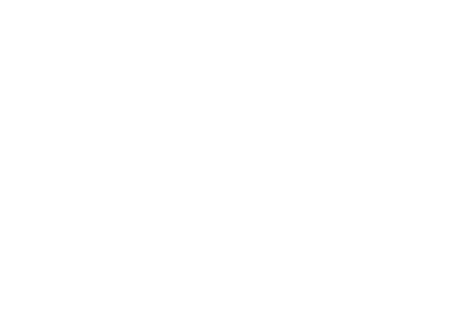

In [78]:
%matplotlib notebook
z = ['Cluster 1', 'Cluster 2']
plt.barh(z,distance[0])
plt.xlabel('Distância')
plt.ylabel('Distância por Cluster')
plt.show()

## Imprimindo Rótulos

In [79]:
# Valores de cluster para cada amostra, seria como se fosse nossas classes
labels = kmeans.labels_

In [80]:
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Visualizando os Centroides

<IPython.core.display.Javascript object>


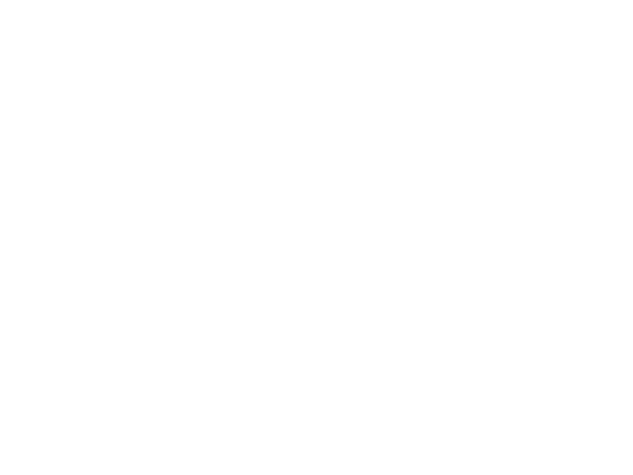

In [81]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(x['MIN_BETWEEN_ET_HT'], x['MAX_BETWEEN_ET_HT'], s = 100, c = kmeans.labels_)

# Aqui são os valores dos centroides que pode ser comentado
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroide')
plt.title('Dataset e Centroides')
plt.xlabel('Classe1')
plt.ylabel('Classe 2')
plt.show()

In [82]:
kmeans.cluster_centers_

array([[2.27e+03, 4.66e+03, 3.18e+04, 3.59e-01, 1.76e+02, 1.79e+02,
        5.66e-02, 5.32e+03, 1.91e-01],
       [1.94e+03, 4.31e+03, 3.50e+07, 4.69e-02, 2.75e+01, 1.81e+02,
        2.30e-02, 1.83e+03, 1.96e-01]])

In [83]:
df.corr()

,CLASS_TYPE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
CLASS_TYPE,1.000000,0.176411,0.094716,-0.028578,0.046285,0.036389,-0.152115,0.024731,0.025601,0.138796
RMS,0.176411,1.000000,0.792406,-0.047871,0.093352,0.093176,0.229784,0.168479,-0.076454,0.222807
MAX_BETWEEN_ET_HT,0.094716,0.792406,1.000000,-0.035677,-0.071299,0.119838,0.151136,-0.022350,-0.072270,0.193187
MIN_BETWEEN_ET_HT,-0.028578,-0.047871,-0.035677,1.000000,-0.008425,-0.006383,0.033715,-0.003440,-0.004542,0.014074
STD_DEVIATION_ET_HT,0.046285,0.093352,-0.071299,-0.008425,1.000000,-0.004824,0.091123,0.013756,-0.005501,0.013375
MRT,0.036389,0.093176,0.119838,-0.006383,-0.004824,1.000000,0.025760,-0.004033,-0.003708,0.007718
MAX_HT,-0.152115,0.229784,0.151136,0.033715,0.091123,0.025760,1.000000,0.037335,-0.064218,0.031398
MIN_HT,0.024731,0.168479,-0.022350,-0.003440,0.013756,-0.004033,0.037335,1.000000,-0.003208,0.082694
STD_HT,0.025601,-0.076454,-0.072270,-0.004542,-0.005501,-0.003708,-0.064218,-0.003208,1.000000,0.027809
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT,0.138796,0.222807,0.193187,0.014074,0.013375,0.007718,0.031398,0.082694,0.027809,1.000000


## Vamos ver como se comporta a predição agora que os dados estão rotulados 

In [84]:
# A mesma imagen criada para o knn
newtest = [[1662.880293, 3801.356089, 26495.72736, 0.000715, 22.505453, 170.125521, 0.019845, 1270.620131, 0.177843],
          [2209.982623, 4477.108873, 31915.37581, 0.00031, 28.573024, 174.733931, 0, 1691.538761, 0.221574],
          [2629.345321, 5541.476611, 32460.75711, 0, 32.167484, 178.075618, 0.006576, 2138.606419, 0.214493]
]

In [85]:
newtest

[[1662.880293,
  3801.356089,
  26495.72736,
  0.000715,
  22.505453,
  170.125521,
  0.019845,
  1270.620131,
  0.177843],
 [2209.982623,
  4477.108873,
  31915.37581,
  0.00031,
  28.573024,
  174.733931,
  0,
  1691.538761,
  0.221574],
 [2629.345321,
  5541.476611,
  32460.75711,
  0,
  32.167484,
  178.075618,
  0.006576,
  2138.606419,
  0.214493]]

In [86]:
# Retorna um array com seus respsctivos Clusteres
kmeans.predict(newtest)

array([0, 0, 0], dtype=int32)

## Visualizando os dados

<IPython.core.display.Javascript object>


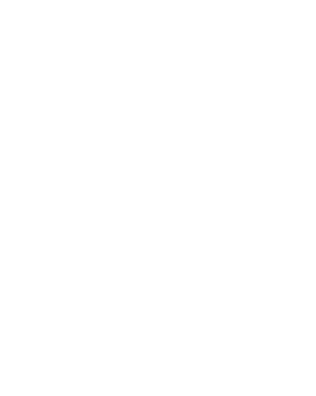

In [87]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(4,5))
ax1.set_title('Original')
ax1.scatter(x['MIN_BETWEEN_ET_HT'], x['MAX_BETWEEN_ET_HT'], s=150, c=sorted(y))
ax2.set_title('kmeans')
ax2.scatter(x['MIN_BETWEEN_ET_HT'], x['MAX_BETWEEN_ET_HT'], s=150, c=sorted(kmeans.labels_))

# Técnicas de validação e comportamento do algoritmo

### Estimando o valor do parâmetro **K** - Metodo Elbow

- O valor do parâmetro **k** é um problema sério quando estamos trabalhando com técnicas de agrupamento, Quando sabemos os rotulos das classes (como no caso de um conjunto de dados Iris) isso se torna mais simples porém, existem situações que não temos a menor ideia de qual seria o melhor parâmetro para **K**.


- O Método que iremos utilizar é conhecido como **Método do cotuvelo**, onde o mesmo procura encontrar um ponto onde a variância de dados com os numeros de cluster não é tão representativa, é aí que podemos ver que a queda não é tão brusca.

1 3655062114463218.0
2 22619001287123.215
3 20832608454260.324
4 20830228907044.28
5 20828763038456.906
6 20828338972168.77
7 20828382692807.375
8 20827069903115.438
9 20826769503164.37
10 20827795058680.66


<IPython.core.display.Javascript object>


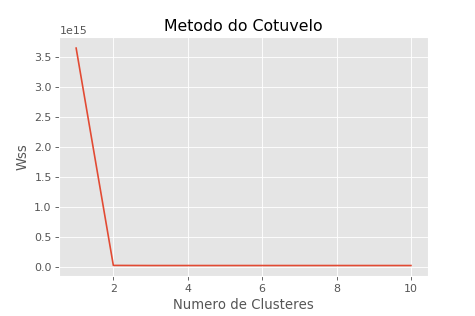

In [88]:
# Vamos plotar um grafo com os erros quadráticos que irá nos apresentar uma figura para melhor entendimento

%matplotlib notebook
wcss = [] # crio uma lista vazia para armazenamentos dos valores

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i, init='random') # para cada iteração estimo o numero de cluster
    kmeans2.fit(x) # agrupamento com o método fit
    print(i, kmeans2.inertia_) # inertia = somatória do erro quadrático
    wcss.append(kmeans2.inertia_) # add os erros na lista
    
#Plotando os resultados
plt.plot(range(1,11), wcss)
plt.title('Metodo do Cotuvelo')
plt.xlabel('Numero de Clusteres')
plt.ylabel('Wss')
plt.show()

# Podemos observar que à partir do numero 2 de cluster as distâncias dos erros já são estabilizadas, então, 
# O número 2 seria o número ideal para cluster e o valor de K

## Validando os dados com Crosstab

In [89]:
# Imprimindo a matriz de confusão.
print(pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0  1  All
Real                
1         71  1   72
2        294  2  296
All      365  3  368


In [90]:
from sklearn import metrics
cluster = ['Cluster 2', 'Cluster 1']
print(metrics.classification_report(y,kmeans.labels_, target_names=cluster))

             precision    recall  f1-score   support

  Cluster 2       0.00      0.00      0.00         0
  Cluster 1       0.33      0.01      0.03        72

avg / total       0.07      0.00      0.01       368



# Aplicando a técnica de PCA para redução de dimenções 

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [92]:
df.columns

Index(['CLASS_TYPE', 'RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT',
       'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')

In [93]:
features = ['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT',
       'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT']

In [94]:
# Separating out the features
x = df.loc[:, features].values

In [95]:
x

array([[2.45e+03, 5.39e+03, 3.34e+04, ..., 1.71e-02, 1.78e+03, 2.16e-01],
       [2.16e+03, 4.62e+03, 3.44e+04, ..., 0.00e+00, 1.89e+03, 1.84e-01],
       [1.74e+03, 4.26e+03, 3.36e+07, ..., 6.51e-03, 2.20e+03, 1.81e-01],
       ...,
       [2.82e+03, 5.31e+03, 3.31e+04, ..., 8.65e-03, 1.66e+03, 2.02e-01],
       [3.40e+03, 5.99e+03, 3.35e+04, ..., 2.66e-02, 1.57e+03, 2.30e-01],
       [2.63e+03, 5.54e+03, 3.25e+04, ..., 6.58e-03, 2.14e+03, 2.14e-01]])

In [96]:
# Separating out the target
y = df.loc[:,['CLASS_TYPE']].values

In [97]:
print(np.array(y))

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


In [98]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [99]:
x

array([[ 0.3 ,  0.89, -0.09, ..., -0.05, -0.05,  0.74],
       [-0.19, -0.05, -0.09, ..., -0.07, -0.05, -0.18],
       [-0.89, -0.48, 10.57, ..., -0.06, -0.04, -0.28],
       ...,
       [ 0.93,  0.8 , -0.09, ..., -0.06, -0.05,  0.34],
       [ 1.89,  1.62, -0.09, ..., -0.04, -0.05,  1.13],
       [ 0.6 ,  1.08, -0.09, ..., -0.06, -0.05,  0.69]])

In [100]:
# Dividindo em número de classes
pca = PCA(n_components=2)

In [101]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [102]:
# Agrupando os dados divididos
principalComponents = pca.fit_transform(x)

In [103]:
principalComponents

array([[ 1.15e+00,  6.08e-02],
       [ 1.33e-01,  5.80e-01],
       [-1.18e+00,  2.78e+00],
       [-1.90e-01,  6.27e-01],
       [ 1.60e-01,  4.89e-01],
       [-5.97e-01, -6.18e-01],
       [-4.32e-02,  6.05e-01],
       [-1.50e+00, -5.63e-01],
       [-3.13e-01, -3.62e-01],
       [-6.19e-01,  7.18e-01],
       [-3.31e-01,  5.52e-01],
       [-8.65e-01,  1.84e-01],
       [-9.96e-01, -1.44e-01],
       [-9.16e-01, -5.81e-01],
       [ 4.26e-02, -1.47e-01],
       [ 9.60e-02,  4.11e-01],
       [-9.22e-01,  9.87e-01],
       [ 9.76e-02,  3.28e-01],
       [-3.76e-01,  4.43e-01],
       [ 3.72e-02,  3.87e-01],
       [-1.42e+00, -4.53e-01],
       [-1.21e+00,  3.86e-01],
       [-6.36e-01, -3.59e-01],
       [ 1.17e+00, -8.58e-01],
       [-3.89e-01,  6.10e-01],
       [ 2.78e-01,  5.36e-01],
       [-1.08e+00,  4.46e-01],
       [-2.45e+00,  9.26e-01],
       [-8.04e-01,  4.73e-01],
       [-1.19e+00, -1.00e-01],
       [-1.64e+00, -1.04e-01],
       [-2.20e-01, -2.80e-01],
       [

In [104]:
 print(pca.explained_variance_ratio_)  

[0.22 0.12]


In [105]:
# Imprimindo as features
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [106]:
principalDf

,principal component 1,principal component 2
0,1.153724,0.060761
1,0.132825,0.580246
2,-1.181725,2.776260
3,-0.190261,0.627179
4,0.159572,0.488648
5,-0.597064,-0.617605
6,-0.043189,0.604734
7,-1.500989,-0.563052
8,-0.312549,-0.361697
9,-0.619493,0.718021


In [107]:
# Imprimindo as features com as classes
finalDf = pd.concat([principalDf, df[['CLASS_TYPE']]], axis = 1)

In [108]:
finalDf

,principal component 1,principal component 2,CLASS_TYPE
0,1.153724,0.060761,1
1,0.132825,0.580246,1
2,-1.181725,2.776260,1
3,-0.190261,0.627179,1
4,0.159572,0.488648,1
5,-0.597064,-0.617605,1
6,-0.043189,0.604734,1
7,-1.500989,-0.563052,1
8,-0.312549,-0.361697,1
9,-0.619493,0.718021,1


# Visualizando a projeção em 2D

<IPython.core.display.Javascript object>


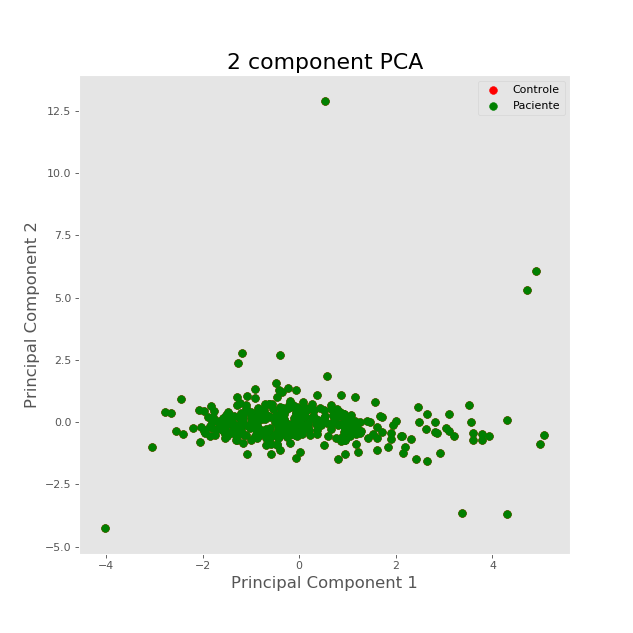

In [109]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Controle', 'Paciente']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CLASS_TYPE'] == df['CLASS_TYPE']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [110]:
df['CLASS_TYPE'].value_counts()

2    296
1     72
Name: CLASS_TYPE, dtype: int64

In [111]:
df.shape

(368, 10)

# Teste de Overfitting

**Overfitting** ou **SobreAjuste** é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

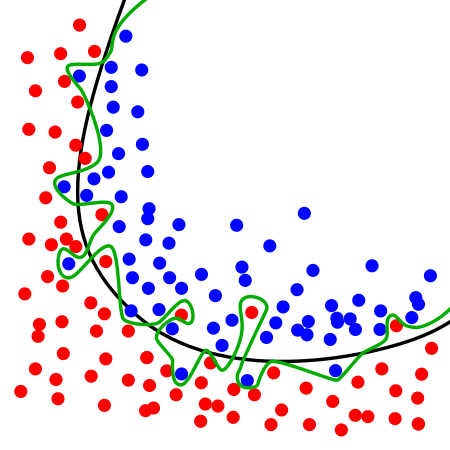

In [112]:
Image(filename ="Overfitting.png", width=300, height=300)

## Para efetuarmos esse processo, utilizaremos os conjutos de teste e treino que efetuamos o split

In [113]:
# Vamos ler novamente o conjunto de dados com um split de 20% para o conjunto de testes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('CLASS_TYPE', axis=1), df['CLASS_TYPE'], test_size=0.25, random_state=123)

In [114]:
# Scala os dados de treino e teste sendo o parâmetro StandadScale utilizado para treinar meu algoritmos
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [115]:
X_train

array([[-0.8 , -0.5 , -0.11, ..., -0.53, -1.26, -1.08],
       [-0.69, -0.56, -0.1 , ..., -0.02, -0.23, -0.31],
       [-1.18, -1.18, -0.1 , ..., -0.8 , -0.76,  0.16],
       ...,
       [ 0.35, -0.91, -0.1 , ...,  0.41,  1.74, -0.24],
       [-0.36, -0.5 , -0.1 , ...,  0.25, -1.01, -1.18],
       [ 0.9 ,  0.77, -0.1 , ..., -0.27,  0.  ,  0.32]])

In [116]:
X_test

array([[-5.11e-01, -2.73e-01,  7.97e-02, -3.23e-01, -3.17e-02, -5.19e-01,
        -9.44e-02, -1.06e-01,  2.65e-01],
       [ 6.01e-01,  1.10e+00,  8.50e-01, -3.23e-01, -1.22e-01, -5.71e-01,
        -1.11e-01, -1.05e-01,  4.69e-01],
       [-8.60e-01,  5.38e-02, -3.91e-02, -3.23e-01, -1.78e+00,  1.46e+00,
        -1.01e-01, -1.06e-01, -1.47e+00],
       [ 1.11e-01,  3.62e-01, -1.01e-01, -3.23e-01, -8.85e-01, -1.82e+00,
        -1.08e-01, -1.05e-01, -6.90e-01],
       [-1.25e+00, -1.69e+00, -1.94e+00, -3.23e-01, -3.36e-01,  1.00e-01,
        -1.11e-01, -1.05e-01, -6.33e-01],
       [-4.76e-01, -9.08e-01, -1.15e-01, -3.23e-01,  1.20e+00,  2.26e+00,
        -1.09e-01, -1.02e-01, -6.11e-02],
       [-9.45e-01, -1.09e+00, -5.89e-01, -3.23e-01, -1.45e+00, -6.12e-01,
        -1.13e-01, -1.06e-01, -6.11e-02],
       [-1.08e+00, -4.08e-01, -1.80e-02, -3.23e-01, -1.74e-01,  9.23e-01,
        -9.93e-02, -1.05e-01,  6.13e-02],
       [ 1.10e+00,  1.36e+00,  3.19e-01, -2.73e-01,  7.27e-01,  8.42e-02